In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# # New environment setup
# nb_states = 3  # S0, S1, S2
# nb_actions = 2  # Left, Right

# # Initialize the Q-table
# Q = np.zeros([nb_states, nb_actions])

# # Define the transition probabilities and expected rewards
# transition_probs = {
#             0: {'L': (1, 0.7), 'R': (2, 0.3)},  # S0 -> S1 with L, S0 -> S2 with R
#             1: {'L': (0, 1), 'R': (0, 1)},  # S1 -> S0 with L or R
#             2: {'L': (0, 1), 'R': (0, 1)}   # S2 -> S0 with L or R
#         }

# # Assume rewards are normally distributed with mean as provided and some small standard deviation
# reward_distribution = {
#             1: np.random.normal(4, 0.1),  # mean of 4 for S1
#             2: np.random.normal(2, 0.1)   # mean of 2 for S2
#         }

# # Learning parameters
# alpha = 0.1
# gamma = 0.9
# epsilon = 0.9
# epsilon_decay = 0.01
# epsilon_final = 0.01

# # Tracking variables
# cumulative_rewards = []
# average_rewards = []

# new_reward_distribution = {
#     'S1': np.random.normal(1, 0.1)  # mean of 1
# }

# for step in range(150):
#     # Check if we're before or after the event horizon
#     if step < 50:
#         state = 0  # Start at S0 for steps before 25
#         transition_probs = {
#             0: {'L': (1, 0.7), 'R': (2, 0.3)},  # S0 -> S1 with L, S0 -> S2 with R
#             1: {'L': (0, 1), 'R': (0, 1)},  # S1 -> S0 with L or R
#             2: {'L': (0, 1), 'R': (0, 1)}   # S2 -> S0 with L or R
#         }
#         reward_distribution = {
#                     1: np.random.normal(4, 0.1),  # mean of 4 for S1
#                     2: np.random.normal(2, 0.1)   # mean of 2 for S2
#                 }
        
#     elif 50 <= step <= 100:
#         state = 1  # Start at S1 for steps 25 and beyond
#         # Adjust the transition probabilities and rewards after step 25
#         transition_probs = {
#             1: {'L': (1, 1), 'R': (1, 1)},  # S1 -> S1 with L or R
#         }
#         reward_distribution = {
#             1: np.random.normal(1, 0.1)  # mean of 1 for S1
#         }
#     else: 
#         state = 0 
#         transition_probs = {
#             0: {'L': (1, 0.7), 'R': (2, 0.3)},  # S0 -> S1 with L, S0 -> S2 with R
#             1: {'L': (0, 1), 'R': (0, 1)},  # S1 -> S0 with L or R
#             2: {'L': (0, 1), 'R': (0, 1)}   # S2 -> S0 with L or R
#         }

#     reward_distribution = {
#                 1: np.random.normal(1, 0.1),  # mean of 4 for S1
#                 2: np.random.normal(2, 0.1)   # mean of 2 for S2
#             }
    
#     cum_reward = 0
    
#     # One step of Q-learning
#     if np.random.rand() < epsilon:
#         action = np.random.choice(['L', 'R'])
#     else:
#         action = 'L' if Q[state, 0] > Q[state, 1] else 'R'

#     print(action)
#     # Update epsilon
#     epsilon = max(epsilon_final, epsilon * (1 - epsilon_decay))
    
#     # Transition to new state and get reward
#     new_state, prob = transition_probs[state][action]
#     reward = reward_distribution[new_state] if new_state != 0 else 0  # No reward for transitioning to S0
    
#     # Q-learning update
#     Q[state, 0 if action == 'L' else 1] += \
#         alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, 0 if action == 'L' else 1])
    
#     # Update cumulative reward
#     cum_reward += reward
#     cumulative_rewards.append(cum_reward)
    
#     # Average reward calculation
#     ave_reward = np.mean(cumulative_rewards)
#     average_rewards.append(ave_reward)
#     # print(cum_reward, step)

# # Plotting the cumulative reward over steps
# plt.plot(cumulative_rewards)
# plt.plot(average_rewards)
# plt.xlabel('Step')
# plt.ylabel('Cumulative Reward')
# plt.legend(['Cumulative Reward', 'Average Reward'])
# plt.show()

# # Print final Q-table
# print('Final Q-Table:')
# print(Q)

## First Phase

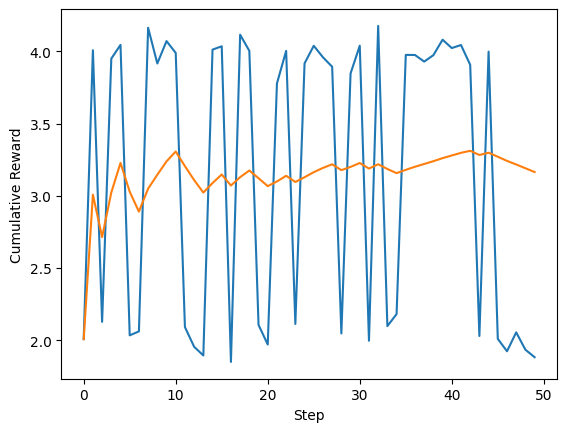

Final Q-Table:
[[2.93775295 1.9237405 ]
 [0.         0.        ]
 [0.         0.        ]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Total number of States and Actions
nb_states = 3  # S0, S1, S2
nb_actions = 2  # Left, Right

# Initialize transition and reward matrices for the smaller state space
MDP_T = np.zeros((nb_states, nb_states, nb_actions))
MDP_R = np.zeros((nb_states, nb_actions))

# Define state transitions for S0
MDP_T[0, 1, 0] = 0.7  # From S0 to S1 with Left action
MDP_T[0, 2, 0] = 0.3  # From S0 to S2 with Left action
MDP_T[0, 2, 1] = 0.7  # From S0 to S2 with Right action
MDP_T[0, 1, 1] = 0.3  # From S0 to S1 with Right action

# Since from S1 and S2 we go back to S0 with probability 1, we only update those
MDP_T[1, 0, 0] = 1.0  # From S1 to S0 with Left action
MDP_T[1, 0, 1] = 1.0  # From S1 to S0 with Right action
MDP_T[2, 0, 0] = 1.0  # From S2 to S0 with Left action
MDP_T[2, 0, 1] = 1.0  # From S2 to S0 with Right action

# Initialize the Q-table
Q = np.zeros([nb_states, nb_actions])

# Learning parameters
alpha = 0.1
gamma = 0.9
epsilon = 0.9
epsilon_decay = 0.01
epsilon_final = 0.01

# Training parameters
nb_steps = 50

# Tracking variables for rewards
cumulative_rewards = []
average_rewards = []
# Train the agent for the specified number of steps
for step in range(nb_steps):
    state = 0  # Start at S0
    cum_reward = 0
    
    # Choose action using epsilon-greedy policy
    if np.random.rand() < epsilon:
        action = np.random.choice([0, 1])  # 0 is Left, 1 is Right
    else:
        action = np.argmax(Q[state])

    # Update epsilon with decay
    epsilon = max(epsilon_final, epsilon * (1 - epsilon_decay))
    
    # Transition to new state based on action
    if action == 0:  # Left action
        new_state = np.random.choice([1, 2], p=[0.7, 0.3])
    else:  # Right action
        new_state = np.random.choice([1, 2], p=[0.3, 0.7])
    
    # Get reward from normal distribution centered at 4 for S1 and 2 for S2
    reward = np.random.normal(4 if new_state == 1 else 2, 0.1)
    
    # Update Q-table with Q-learning equation
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
    
    # Update cumulative reward
    cum_reward += reward
    cumulative_rewards.append(cum_reward)
    ave_reward = np.mean(cumulative_rewards)
    average_rewards.append(ave_reward)
    
    # Reset to S0 since in this MDP all actions lead back to S0
    state = 0

# Plotting the cumulative reward over steps
plt.plot(cumulative_rewards)
plt.plot(average_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.show()

# Display final Q-table
print('Final Q-Table:')
print(Q)


### Three Phases MB & MF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(200)

# # Total number of States and Actions
# nb_states = 3  # S0, S1, S2
# nb_actions = 2  # Left, Right

# # Initialize transition and reward matrices for the smaller state space
# MDP_T = np.zeros((nb_states, nb_states, nb_actions))
# MDP_R = np.zeros((nb_states, nb_actions))

# # Define state transitions for S0
# MDP_T[0, 1, 0] = 0.7  # From S0 to S1 with Left action
# MDP_T[0, 2, 0] = 0.3  # From S0 to S2 with Left action
# MDP_T[0, 2, 1] = 0.7  # From S0 to S2 with Right action
# MDP_T[0, 1, 1] = 0.3  # From S0 to S1 with Right action

# # Since from S1 and S2 we go back to S0 with probability 1, we only update those
# MDP_T[1, 0, 0] = 1.0  # From S1 to S0 with Left action
# MDP_T[1, 0, 1] = 1.0  # From S1 to S0 with Right action
# MDP_T[2, 0, 0] = 1.0  # From S2 to S0 with Left action
# MDP_T[2, 0, 1] = 1.0  # From S2 to S0 with Right action



# Training parameters
nb_steps = 150

def run_simulation_mf(seed):
    # Tracking variables for rewards
    cumulative_rewards_mf = [0]
    step_rewards_mf = []
    average_sum_mf = []
    np.random.seed(seed)
    # Initialize the Q-table
    
    # Learning parameters
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.9
    epsilon_decay = 0.01
    epsilon_final = 0.01
    # Total number of States and Actions
    nb_states = 3  # S0, S1, S2
    nb_actions = 2  # Left, Right
    
    # Initialize transition and reward matrices for the smaller state space
    MDP_T = np.zeros((nb_states, nb_states, nb_actions))
    MDP_R = np.zeros((nb_states, nb_actions))
    
    # Define state transitions for S0
    MDP_T[0, 1, 0] = 0.7  # From S0 to S1 with Left action
    MDP_T[0, 2, 0] = 0.3  
    MDP_T[0, 2, 1] = 0.7  # From S0 to S2 with Right action
    MDP_T[0, 1, 1] = 0.3  
    
    # Since from S1 and S2 we go back to S0 with probability 1, we only update those
    MDP_T[1, 0, 0] = 1.0  # From S1 to S0 with Left action
    MDP_T[1, 0, 1] = 1.0  
    MDP_T[2, 0, 0] = 1.0  # From S2 to S0 with Left action
    MDP_T[2, 0, 1] = 1.0  
    Q = np.zeros([nb_states, nb_actions])

    # Train the agent for the specified number of steps
    for step in range(nb_steps):
        state = 0  # Start at S0
        cum_reward = cumulative_rewards_mf[-1]  # Start with the last cumulative reward
        
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])  # 0 is Left, 1 is Right
        else:
            action = np.argmax(Q[state])
    
        # Update epsilon with decay
        epsilon = max(epsilon_final, epsilon * (1 - epsilon_decay))
        
        # Phase 1 and 3 dynamics
        if step < 50 or step >= 100:
            # Transition to new state based on action
            if action == 0:  # Left action
                new_state = np.random.choice([1, 2], p=[0.7, 0.3])
            else:  # Right action
                new_state = np.random.choice([1, 2], p=[0.3, 0.7])
            
            # Get reward from normal distribution centered at 4 for S1 and 2 for S2 in phase 1
            # and centered at 1 for S1 in phase 3
            mean_reward = 4 if new_state == 1 else 2
            if step >= 100:
                mean_reward = 1 if new_state == 1 else mean_reward
            reward = np.random.normal(mean_reward, 0.1)
            
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
    
        # Phase 2 dynamics
        elif 50 <= step < 100:
            new_state = 1  # Always transition to S1
            reward = np.random.normal(1, 0.1)  # Reward for S1 is now normally distributed with mean 1
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
        
        # Update cumulative reward
        cum_reward += reward
        step_rewards_mf.append(reward)
        cumulative_rewards_mf.append(cum_reward)
        average_sum_mf.append(np.mean(cumulative_rewards_mf))
        
        # Reset to S0 for next step if not in phase 2
        if step < 50 or step >= 100:
            state = 0
    return cumulative_rewards_mf

# # Plotting the cumulative reward over steps
# plt.plot(cumulative_rewards_mf)
# # plt.plot(step_rewards_mf)
# plt.plot(average_sum_mf)
# plt.legend(['Cumulative Reward', 'Average Reward'])
# plt.xlabel('Step')
# plt.ylabel('Cumulative Reward')
# plt.show()
# # Display final Q-table
# print('Final Q-Table:')
# print(Q)


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def run_simulation_mb(seed):
    np.random.seed(seed)
        # Learning parameters
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.9
    epsilon_decay = 0.01
    epsilon_final = 0.01
    # Tracking variables for rewards
    cumulative_rewards_mb = [0]
    step_rewards_mb = []
    average_sum_mb = []

    # Total number of States and Actions
    nb_states = 3  # S0, S1, S2
    nb_actions = 2  # Left, Right
    
    # Initialize transition and reward matrices for the smaller state space
    MDP_T = np.zeros((nb_states, nb_states, nb_actions))
    MDP_R = np.zeros((nb_states, nb_actions))
    
    # Define state transitions for S0
    MDP_T[0, 1, 0] = 0.7  # From S0 to S1 with Left action
    MDP_T[0, 2, 0] = 0.3  # From S0 to S2 with Left action
    MDP_T[0, 2, 1] = 0.7  # From S0 to S2 with Right action
    MDP_T[0, 1, 1] = 0.3  # From S0 to S1 with Right action
    
    # Since from S1 and S2 we go back to S0 with probability 1, we only update those
    MDP_T[1, 0, 0] = 1.0  # From S1 to S0 with Left action
    MDP_T[1, 0, 1] = 1.0  # From S1 to S0 with Right action
    MDP_T[2, 0, 0] = 1.0  # From S2 to S0 with Left action
    MDP_T[2, 0, 1] = 1.0  # From S2 to S0 with Right action

    Q2 = np.zeros([nb_states, nb_actions])
    # Train the agent for the specified number of steps
    for step in range(nb_steps):
        state = 0  # Start at S0
        cum_reward = cumulative_rewards_mb[-1]  # Start with the last cumulative reward
        
        # Choose action using epsilon-greedy policy--Without knowing about the transition probability
        # if np.random.rand() < epsilon:
        #     action = np.random.choice([0, 1])  # 0 is Left, 1 is Right
        # else:
        #     if step < 50 or step >= 100:
        #         action = 0 if state == 0 else np.argmax(Q[state])  # Prefer Left in S0
        #     elif 50 <= step < 100:
        #         action = np.argmax(Q[state])  # In phase 2, the agent is stuck in S1, so it follows the Q-table
        if state == 0:
            # At S0, decide whether to go left or right based on transition probabilities
            if np.random.rand() < epsilon:
                # Exploration: choose a random action
                action = np.random.choice([0, 1])  # 0 is Left, 1 is Right
            else:
                # Exploitation: choose the action with the higher transition probability
                # If Q-value for going left is higher or equal to going right, choose left because it has a higher probability to go to S1
                # Otherwise, choose right because it has a higher probability to go to S2
                action = 0 if Q2[state, 0] >= Q2[state, 1] else 1
        else:
            # For S1 and S2, follow the Q-table to decide the action
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])
            else:
                action = np.argmax(Q2[state])

        # Update epsilon with decay
        epsilon = max(epsilon_final, epsilon * (1 - epsilon_decay))
        
        # Phase 1 and 3 dynamics
        if step < 50 or step >= 100:
            # Transition to new state based on action
            if action == 0:  # Left action
                new_state = 1
                # new_state = np.random.choice([1, 2], p=[0.7, 0.3])
            else:  # Right action
                new_state = 2
                # new_state = np.random.choice([1, 2], p=[0.3, 0.7])
            
            # Get reward from normal distribution centered at 4 for S1 and 2 for S2 in phase 1
            # and centered at 1 for S1 in phase 3
            mean_reward = 4 if new_state == 1 else 2
            if step >= 100:
                mean_reward = 1 if new_state == 1 else mean_reward
            reward = np.random.normal(mean_reward, 0.1)
            
            Q2[state, action] = Q2[state, action] + alpha * (reward + gamma * np.max(Q2[new_state]) - Q2[state, action])
        # Phase 2 dynamics
        elif 50 <= step < 100:
            new_state = 1  # Always transition to S1
            reward = np.random.normal(1, 0.1)  # Reward for S1 is now normally distributed with mean 1
            Q2[state, action] = Q2[state, action] + alpha * (reward + gamma * np.max(Q2[new_state]) - Q2[state, action])
        
        # Update cumulative reward
        cum_reward += reward
        step_rewards_mb.append(reward)
        cumulative_rewards_mb.append(cum_reward)
        average_sum_mb.append(np.mean(cumulative_rewards_mb))
        
        # Reset to S0 for next step if not in phase 2
        if step < 50 or step >= 100:
            state = 0
    
    return cumulative_rewards_mb

# # Plotting the cumulative reward over steps
# plt.plot(cumulative_rewards_mb,'r')
# plt.plot(average_sum_mb)
# plt.plot(cumulative_rewards_mf,'b')
# # plt.plot(step_rewards)
# plt.plot(average_sum_mf)
# plt.xlabel('Step')
# plt.ylabel('Cumulative Reward')
# plt.legend(['MBCumulative Reward', 'MBAverage Reward','MFCumulative Reward', 'MFAverage Reward'])
# plt.show()

# # Display final Q-table
# print('Final Q-Table:')
# print(Q2)


Length checks: 151 151 150
Arrays shapes: (151,) (151,)


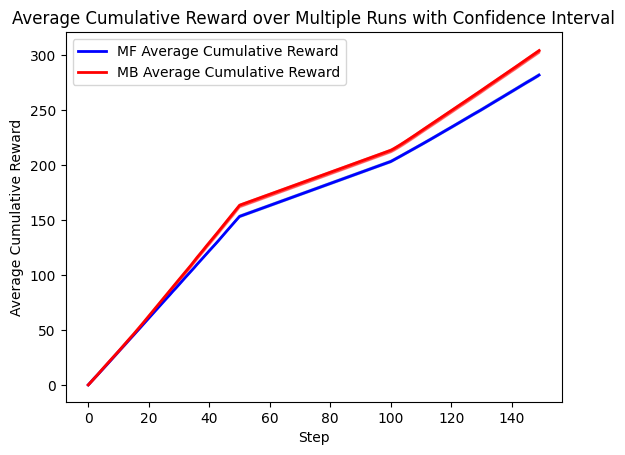

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_runs = 100  # or however many runs you want to perform
all_cumulative_rewards_mf = []
all_cumulative_rewards_mb = []

# Run simulations
for i in range(num_runs):
    seed = i  # or you could randomly generate a seed
    cumulative_rewards_mf = run_simulation_mf(seed)
    cumulative_rewards_mb = run_simulation_mb(seed)
    all_cumulative_rewards_mf.append(cumulative_rewards_mf)
    all_cumulative_rewards_mb.append(cumulative_rewards_mb)

# Convert to numpy arrays for ease of calculation
all_cumulative_rewards_mf = np.array(all_cumulative_rewards_mf)
all_cumulative_rewards_mb = np.array(all_cumulative_rewards_mb)

# Calculate means and standard errors across runs
mean_cumulative_rewards_mf = np.mean(all_cumulative_rewards_mf, axis=0)
stderr_mf = stats.sem(all_cumulative_rewards_mf, axis=0)
mean_cumulative_rewards_mb = np.mean(all_cumulative_rewards_mb, axis=0)
stderr_mb = stats.sem(all_cumulative_rewards_mb, axis=0)

# Calculate the confidence intervals
confidence = 0.95
h_mf = stderr_mf * stats.t.ppf((1 + confidence) / 2, num_runs - 1)
h_mb = stderr_mb * stats.t.ppf((1 + confidence) / 2, num_runs - 1)

# Debugging: Check array lengths
print("Length checks:", len(mean_cumulative_rewards_mf), len(h_mf), nb_steps)
print("Arrays shapes:", mean_cumulative_rewards_mf.shape, h_mf.shape)

# Ensure the lengths match nb_steps
mean_cumulative_rewards_mf = mean_cumulative_rewards_mf[:nb_steps]
h_mf = h_mf[:nb_steps]
mean_cumulative_rewards_mb = mean_cumulative_rewards_mb[:nb_steps]
h_mb = h_mb[:nb_steps]

# Plotting the mean cumulative rewards with confidence intervals
plt.fill_between(range(nb_steps), mean_cumulative_rewards_mf - h_mf, mean_cumulative_rewards_mf + h_mf, alpha=0.5)
plt.plot(mean_cumulative_rewards_mf, 'b-', lw=2, label='MF Average Cumulative Reward')

plt.fill_between(range(nb_steps), mean_cumulative_rewards_mb - h_mb, mean_cumulative_rewards_mb + h_mb, alpha=0.5, color='red')
plt.plot(mean_cumulative_rewards_mb, 'r-', lw=2, label='MB Average Cumulative Reward')

plt.xlabel('Step')
plt.ylabel('Average Cumulative Reward')
plt.title('Average Cumulative Reward over Multiple Runs with Confidence Interval')
plt.legend()
plt.show()